<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a> 
4. <a href="#item33">Preparación de datos</a> 
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [1]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

In [16]:
#cargamos la data

pddf = pd.read_csv('HousingData 2.csv')

In [ ]:
pddf.head()

In [ ]:
pddf.shape

In [ ]:
# Vamos a describir la información
pddf.describe().transpose()


In [ ]:
# Gráfico de distribución 
import seaborn as sns
sns.displot(pddf.NOX, kind="kde", fill=True)

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.NOX, orient="v")
ax = sns.swarmplot(data=pddf.NOX, color=".25")


In [ ]:
sns.displot(pddf.MEDV, kind="kde", fill=True)

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [ ]:
pddf.head()

In [24]:
# Shuffle the data
from sklearn.utils import shuffle
pddf = shuffle(pddf, random_state = 123)


In [ ]:
# Elección de variables
features = list(set(pddf.columns.tolist()) - set(['MEDV']))
features


In [76]:
# Definiendo data
X = pddf[features]
y = pddf.MEDV


In [77]:
# Muestreo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, 
                                                    random_state = 123)


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(X_train.NOX, y_train)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [ ]:
plt.scatter(X_train.NOX, y_train, alpha = 0.5)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [ ]:
# Matriz de scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30, 20))


## 3. Pre-selección de variables

In [78]:
# Dando formato a nuestra tabla resumen

pdResume = X_train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)


In [79]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/X_train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [108]:
# Calculando las correlaciones de todas las variables con el target

temp = X_train.copy()
temp['target'] = y_train

correlations = []
for col in features:
  correlations.append(temp[[col, 'target']].corr().iloc[0][1])


In [121]:
# Cruzando correlaciones con la tabla de resumen original

pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')


In [ ]:
pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

pdResume2.head()

In [126]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

## 4. Preparación de datos

<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

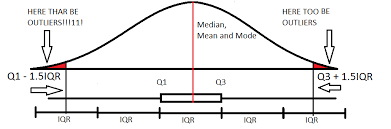 

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head() 

In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "CRIM_tric", kind="kde", fill=True)

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [ ]:
univariate_II.head()

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

Revisemos los resultados

In [ ]:
sns.displot(X_train, x = "Score_Source_2", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x = "Score_Source_2_tzscore", kind="kde", fill=True)

In [ ]:
sns.displot(X_train, x="Score_Source_2_tzscore", hue='Default', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="Default", y="Score_Source_2_tzscore", data=X_train, palette = 'hls')

In [ ]:
#Calculando el gini univariado de todas las variables

features_outtreat_zscore = [x  + '_tzscore' for x in univariate_II.feature.tolist()]
features_outtreat_tric = [x  + '_tric' for x in univariate_II.feature.tolist()]


In [ ]:
#Calculando el gini univariado de todas las variables

ginisZeroZscore = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_zscore]
ginisZeroTric = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(0))*2-1 for col in features_outtreat_tric]


In [ ]:
temp = X_train.copy()
temp['y'] = y_train

ginisNanZscore = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_zscore]
ginisNanTric = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in features_outtreat_tric]


In [ ]:
res_ginis2 = pd.DataFrame({'feature' : univariate_II.feature.tolist(),
                          'giniZeroZscore' : ginisZeroZscore,
                          'giniZeroTric' : ginisZeroTric,
                          'giniNanZscore' : ginisNanZscore,
                          'giniNanTric'  : ginisNanTric})

In [ ]:
univariate_III = pd.merge(univariate_II, res_ginis2, on = 'feature', how='left')
univariate_III[['feature'] + [x for x in univariate_III.columns.tolist() if 'gini' in x]].head(10)

### Tratamiento de Missings

In [ ]:
# Trataiento de missings

data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
data[[x + '_t' for x in numFeatures]].head(30)

In [ ]:
X_train.groupby(['Client_Gender']).agg({"ID":"count",
                                        "Default" :"mean"}).reset_index()

In [ ]:
X_train.corr()